In [592]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing various sklearn libraries for RFE and LinearRegression and other calculations
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodels libraries and api for VIF and Linear regression models
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [460]:
# Read data
BikeData = pd.read_csv('day.csv')

In [462]:
#Check data
BikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Dropping columns due to described reasons:
1. dteday: As we already have seperate column for month and year, having date column doesn't add much value so dropping it.
2. casual and registered: as target variable is exact sum of both of these columns, there is no value in having these in predictor, as their value will have highest obvious higher co-relation to target varible and might hide the effect of other variables.
3. instand: We do not require index column for analysis



In [465]:
#Dropping unnecessory calumns
BikeData.drop(labels=["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [467]:
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Converting Categorical features into dummy variables

### 1. Converting season from numbers to associated values

In [470]:
BikeData['season'] = BikeData.season.map({1:'spring', 2:'summer', 3: 'fall', 4:'winter'})

In [472]:
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [474]:
#Verifiy if all the data are converted successfully.
BikeData.season.unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [476]:
#Now check all the unique values for mnth and convert them to actual months
BikeData.mnth.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [478]:
#Convert months to categorical month
BikeData["mnth"] = BikeData.mnth.map({1:"Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "June", 7: "July", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
BikeData.mnth.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [480]:
#Check all unique values for all other features
BikeData['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [482]:
#Converting Days to strings
BikeData['weekday'] = BikeData['weekday'].map({0: "Mon", 1: "Tues", 2: "wed", 3: "Thur", 4: "Fri", 5: "Sat", 6: "Sun"})
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tues,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,wed,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thur,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [484]:
#Verifying working day
BikeData.workingday.unique()

array([0, 1], dtype=int64)

In [486]:
#Verifying weathersit
BikeData.weathersit.unique()

array([2, 1, 3], dtype=int64)

In [488]:
#Converting weathersit
BikeData.weathersit = BikeData.weathersit.map({1: "clear",2: "Cloudy", 3: "snow", 4: "rain"})

In [490]:
#Check dataset now
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tues,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thur,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [492]:
#Check continuous data type features
BikeData[["yr","temp", "atemp", "hum", "windspeed", "cnt"]].describe()

,yr,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Performing EDA on final Data

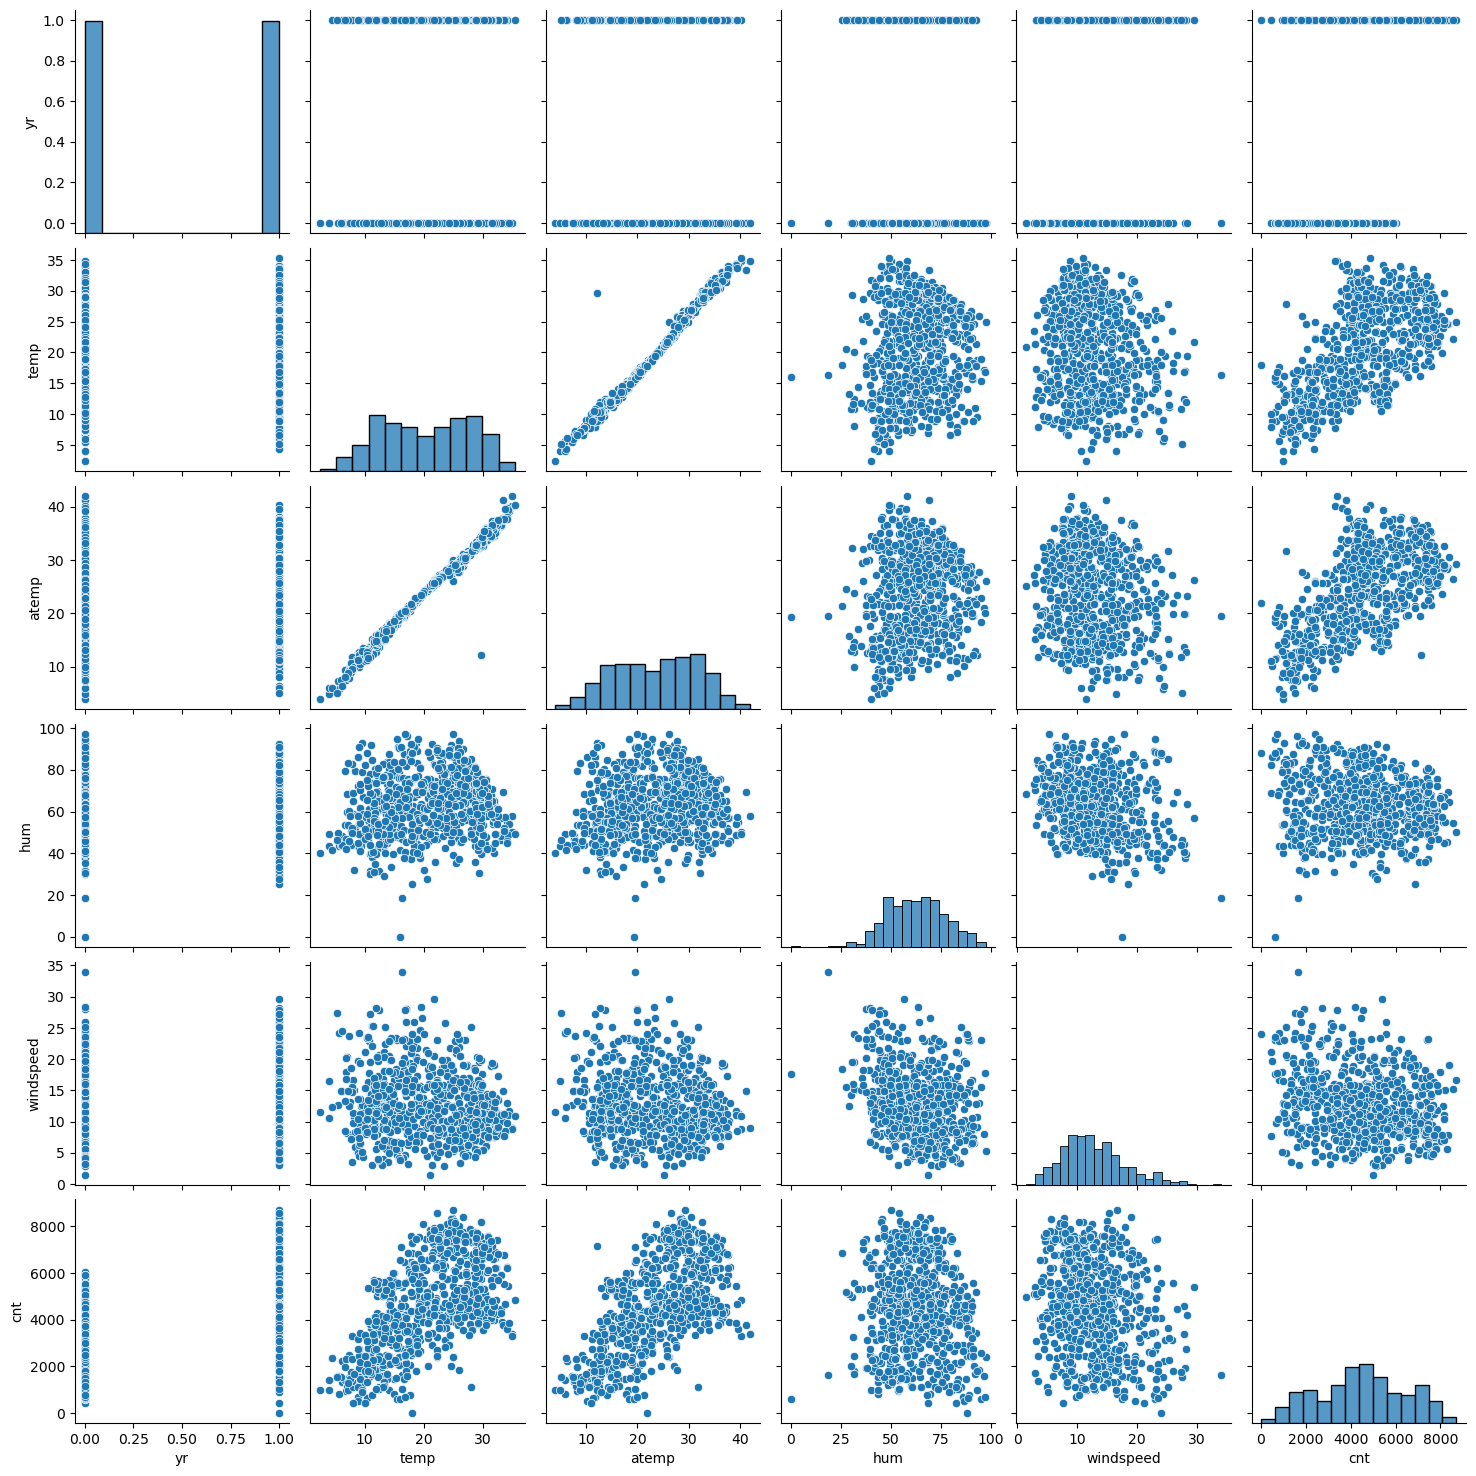

In [495]:
#Visualising continuous data
sns.pairplot(BikeData[["yr","temp", "atemp", "hum", "windspeed", "cnt"]])
plt.show()

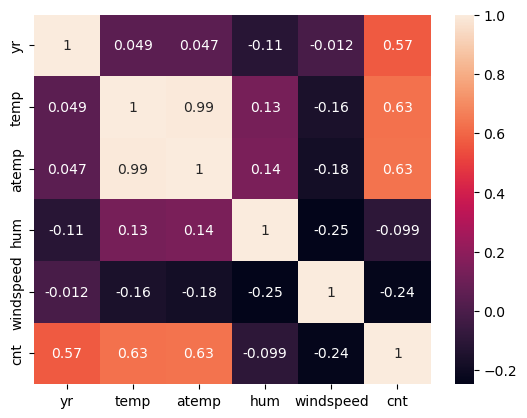

In [496]:
#Visualising continuous data in heatmap to get better picture of correlation.
sns.heatmap(data=BikeData[["yr","temp", "atemp", "hum", "windspeed", "cnt"]].corr(), annot=True)
plt.show()

### We could draw below conclusion from provided data
1. temp and atemp are highly correlated (multicollinearity) with each others and with cnt as well. In hetmap we could see that there is .99 correlation between both and .63 with target variables.          Not here
2. because atemp (feeling temperature in Celsius) is derived using temperature and other factors like windspeed, humidity, keeping it could help reduce no of predictor for model, therefore feature temp will be dropped.
3. No other parameters seems to have good enough correlation with cnt, but might have a significant correlation in combination with other properties.
4. Year looks like categorical variable in database (due to value 0,1), but as year itself is continuous, it could be used a continuous variable for future prediction post 2019. Regression model will give better idea if we should keep it or not.
5. In regression model input, value for year could be like yr = (CurrentYear - 2018)   

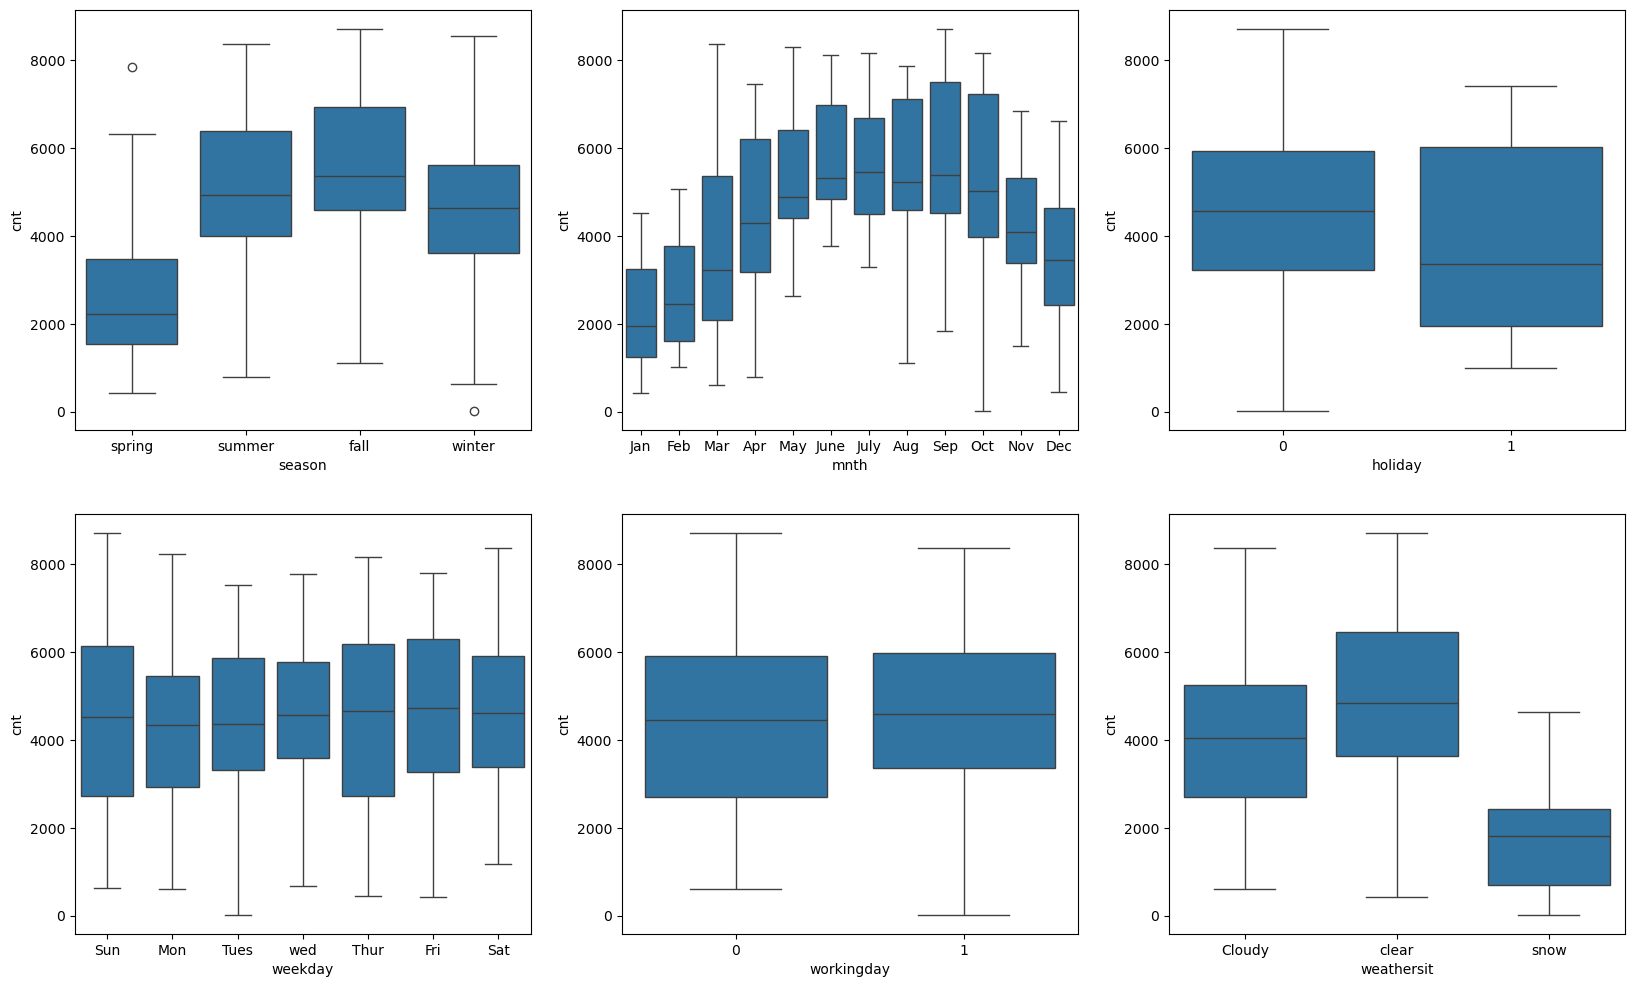

In [499]:
# Visualizing categorical data with cnt
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeData)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeData)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = BikeData)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeData)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = BikeData)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeData)
plt.show()

## These conclusion could be drawn after comparing categorical data
1. Weather have much more impact than anything else. Spring has lowerst overall rental due to possibility of rain. All other seasons faired well specially summer and fall. Winter again is shown some drop, as riding bike in winters is difficult.
2. Months are showing similar pattern as seasons, and showing sign of multicollinearity. Rides are rising from Jan till Sep, then showing drop till december. As Nov-feb are usually peak winter and snowfall season, rides are less.
3. Weathersit also following simial patter, and snow time which is mostly winter season showing lowest rides, while clear wheather (Summer/fall) showing highest rides. multicollinearity need to be verified and handled for Season, Month, and wathersit columns.
4. Weekday having really neglagible correlation as median is in same range. Similar with working days. 

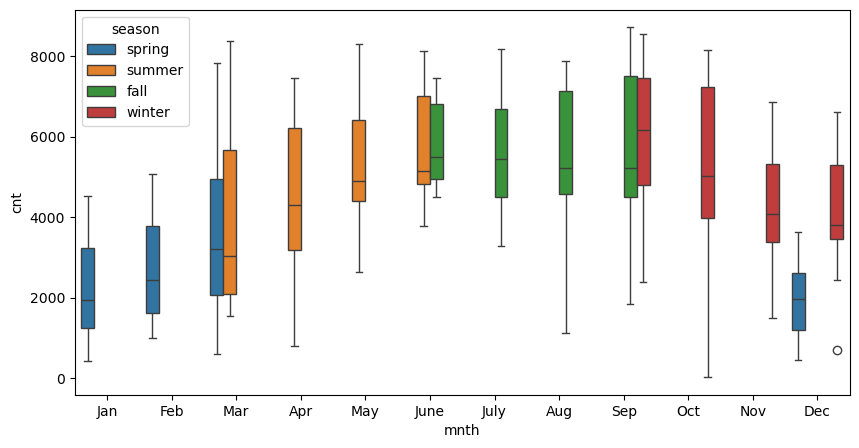

In [501]:
#Let's compare season, month and weathersit parallel to each other to see the sign of multicollinearity
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = "season", data = BikeData)
plt.show()

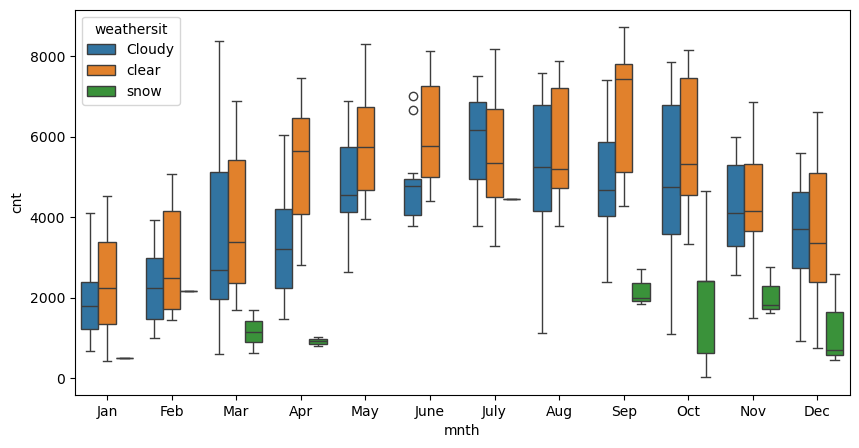

In [502]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = "weathersit", data = BikeData)
plt.show()

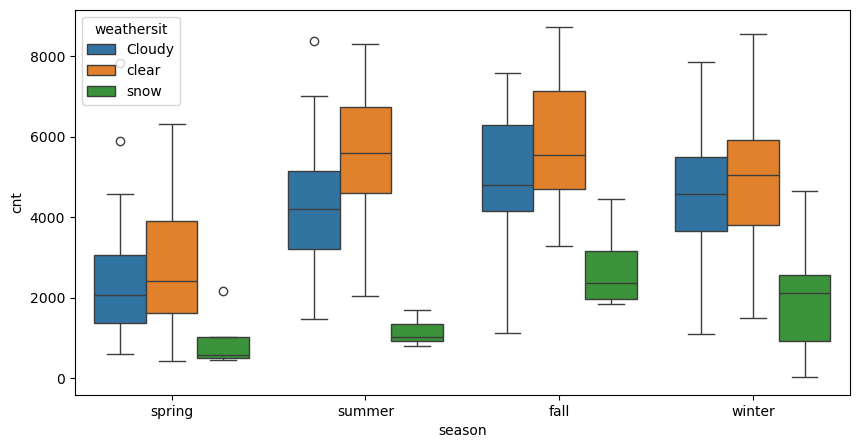

In [503]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = "weathersit", data = BikeData)
plt.show()

### Observations on categorical data
1. After comparing categorical featues, we could conclude that atleast month and season have multicollinearity and as month will create large no of dummy variables, it better to drop month, and keep only season and weathersit.
2. weathersit and seasons are not completely correlated and could be kept to add better prospective, and will observe these variables during model building.
   


In [505]:
#Dropping month feature
#BikeData.drop(labels="mnth", axis=1, inplace=True)

In [509]:
#Revewing final dataset
BikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tues,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thur,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Preparing data for Model building

In [513]:
#Create dummy variables
ColListForDummy = ["season", "weekday", "weathersit","mnth"]
DummyVars = pd.get_dummies(BikeData[ColListForDummy], dtype=int, drop_first=True)

In [514]:
DummyVars.head()

,season_spring,season_summer,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tues,weekday_wed,weathersit_clear,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [516]:
#Now drop columns converted to dummy and merge dummy table with orignal table
BikeData.drop(labels=ColListForDummy, axis=1, inplace=True)
BikeData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [517]:
# Add the results to the original housing dataframe
BikeData = pd.concat([BikeData, DummyVars], axis = 1)
BikeData.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [520]:
BikeData.shape

(730, 30)

## Splitting the data into training and testing set

In [527]:
# We specify this so that the train and test data set always have the same rows, respectively
# We will take industry standard of 70/30 split for training and testing data
np.random.seed(0)
df_train, df_test = train_test_split(BikeData, train_size = 0.7, test_size = 0.3, random_state = 100)

In [529]:
df_train.shape

(510, 30)

In [530]:
df_test.shape

(219, 30)

In [532]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.000000,0.000000,1.000000,1.000000,1.000000
holiday,510.0,0.025490,0.157763,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,510.0,0.676471,0.468282,0.000000,0.000000,1.000000,1.000000,1.000000
temp,510.0,20.102429,7.431169,2.424346,13.606865,20.209597,26.615847,35.328347
atemp,510.0,23.493909,8.090038,3.953480,16.603063,24.020400,30.177700,42.044800
hum,510.0,63.112926,14.156632,0.000000,52.270825,63.437500,73.250025,97.041700
windspeed,510.0,12.831318,5.291832,2.834381,9.041918,12.083182,15.750879,34.000021
cnt,510.0,4486.382353,1952.158739,22.000000,3120.000000,4530.000000,5973.500000,8714.000000
season_spring,510.0,0.243137,0.429398,0.000000,0.000000,0.000000,0.000000,1.000000
season_summer,510.0,0.245098,0.430568,0.000000,0.000000,0.000000,0.000000,1.000000


## Scaling the Features
> As most of the features are categorical with values 0 or 1, it's useful to scale all other features within this range for better understanding of correlations

> We will be using Min-Max scaling method to perform scaling 

In [537]:
#Create scaler object
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables, only to features with continuous values
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]

#Apply scaling to all continuous features
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [539]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [541]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


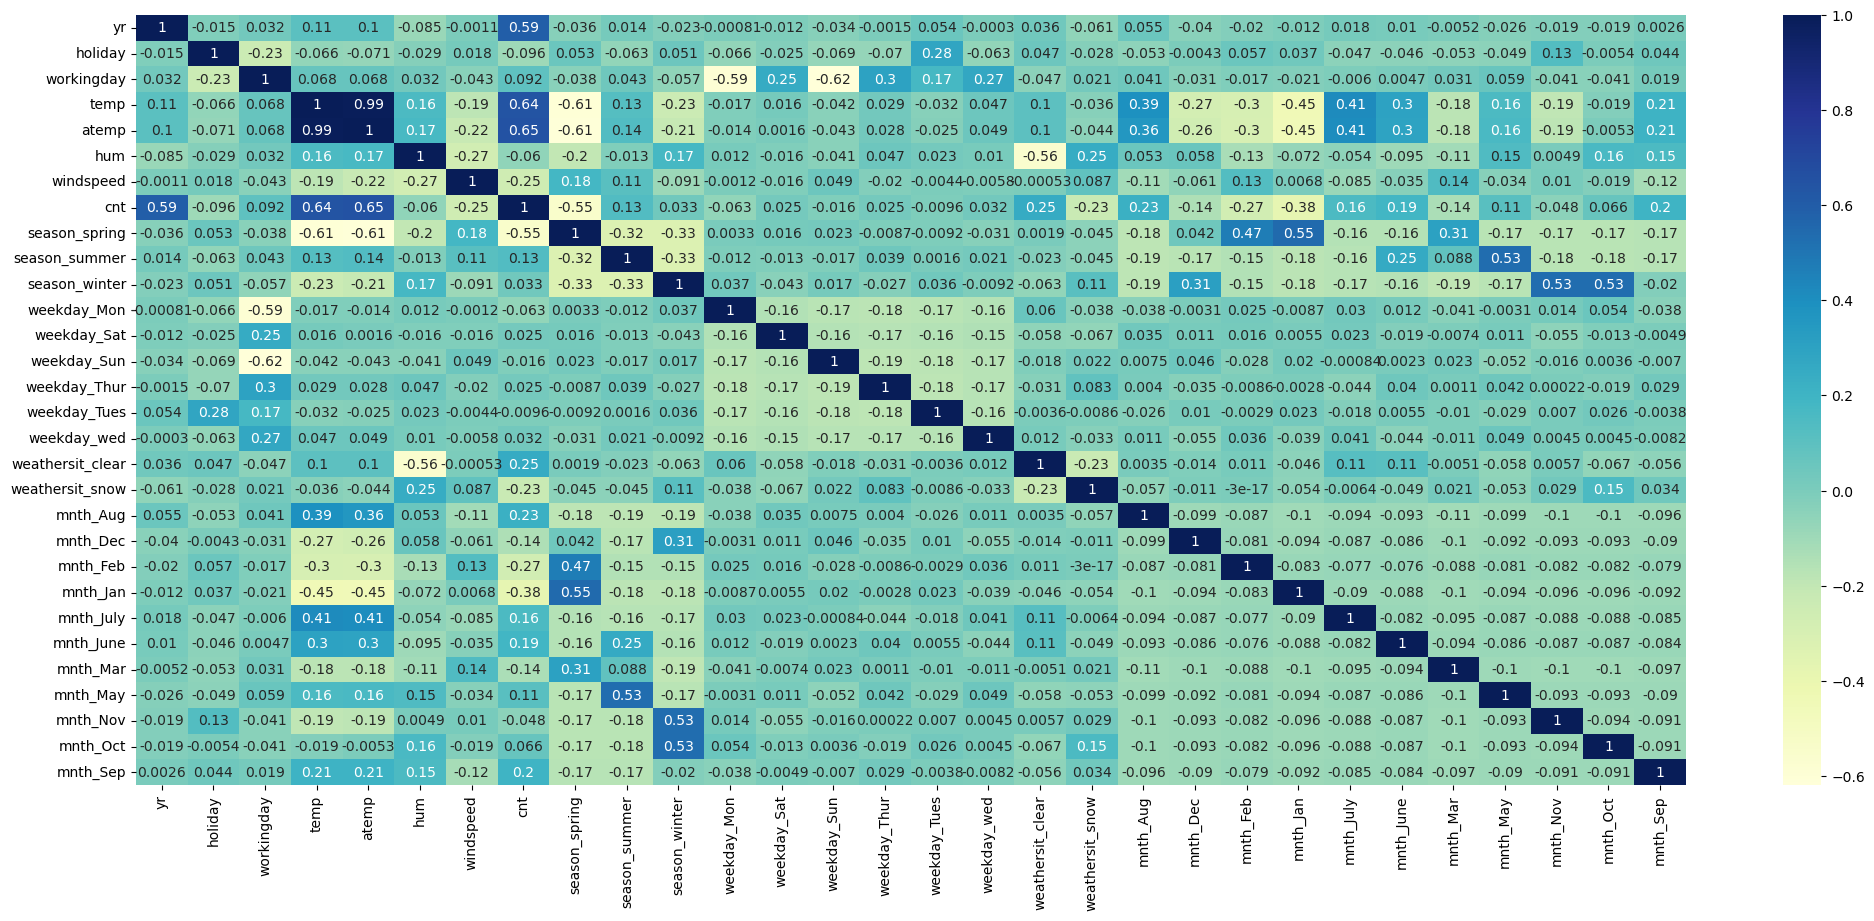

In [543]:
#Let's now check correlation coeffecients
plt.figure(figsize = (25, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Observations:
1. We could observe that, below features are showing higher correlation to cnt:
2. temp, atemp, windspeed, season_spring, weathersit_clear, weekday_thursday with correlation higher than 25%. Most of the features are showing very little correlation, which means we could drop lot's of features from model

### Splitting training set data to X and Y set for model building

In [545]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building the model using RFE

In [547]:
# Running RFE with the output number of the variable equal to 15 (Reducing half the features as no of feature list is highly correlated and most of the features having very little correlation with target variable.)
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [548]:
# running RFE
rfe = RFE(lm, n_features_to_select=20, step=1)

In [549]:
rfe = rfe.fit(X_train, y_train)

In [550]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', False, 6),
 ('weekday_Sun', True, 1),
 ('weekday_Thur', False, 8),
 ('weekday_Tues', False, 4),
 ('weekday_wed', False, 5),
 ('weathersit_clear', True, 1),
 ('weathersit_snow', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1)]

In [551]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Sun',
       'weathersit_clear', 'weathersit_snow', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_July', 'mnth_May', 'mnth_Nov', 'mnth_Sep'],
      dtype='object')


## Building Model using states model for detailed statistic

In [560]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [561]:
#Adding an constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [563]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [566]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.94e-188
Time:                        00:24:46   Log-Likelihood:                 526.26
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     489   BIC:                            -921.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2389      0.042  

In [568]:
# We could see that atemp has p value .852, which is far out of acceptable range, dropping the value and rebuilding the model.

In [570]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit() 

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          1.59e-189
Time:                        00:24:46   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2386      0.042  

In [572]:
# Now we see that model fit is improved slightly with value change in Adj. R-squared and Prob (F-statistic) but still no significant improvement and we still have many features with higher probability.
# Dropping such feature mnth_May which has highest p value .148

X_train_new = X_train_new.drop(["mnth_May"], axis = 1)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit() 

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          3.55e-190
Time:                        00:24:47   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2273      0.041  

In [574]:
#  Adj. R-squared dropped slightly, but Prob (F-statistic) improved further. No significant improvement and we still have many features with higher probability.
# Dropping such feature mnth_Feb which has highest p value .112

X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit() 

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          9.55e-191
Time:                        00:24:47   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2161      0.040  

In [576]:
# feature holiday having p value over acceptable limit, therefore dropping it as well
X_train_new = X_train_new.drop(["holiday"], axis = 1)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit() 

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          4.53e-191
Time:                        00:24:47   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2098      0.040  

In [598]:
# Model so far looks fine with most of parameters including P value in limit for all the features.
# Calculating VIF to see if there is any sign of multicollinearity

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,105.62
6,season_spring,5.26
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.94
15,mnth_Nov,1.73
13,mnth_Jan,1.68
2,workingday,1.66
9,weekday_Sun,1.65


In [600]:
# feature season_spring have VIF over 5, Although it's acceptible, but try removing it to see if it imrpoves or keep model performance uneffective
X_train_new = X_train_new.drop(["season_spring"], axis = 1)

# Running the linear model
lm = sm.OLS(y_train,X_train_new).fit() 

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 04 Dec 2024   Prob (F-statistic):          2.78e-190
Time:                        00:33:38   Log-Likelihood:                 517.30
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     494   BIC:                            -934.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1469      0.035  

In [605]:
#Check VIF again
# Calculating VIF to see if there is any sign of multicollinearity
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,76.96
3,temp,2.33
7,season_winter,2.08
4,hum,1.92
14,mnth_Nov,1.68
12,mnth_Jan,1.67
2,workingday,1.65
8,weekday_Sun,1.65
9,weathersit_clear,1.62
11,mnth_Dec,1.48


> Now model looks good, therefore performing further analysis on model to validate if it fits all the requirements
> VIF also explains that multicollinearity is not there.

## Residual Analysis on model

In [608]:
y_train_Pred = lm.predict(X_train_new)

In [610]:
%matplotlib inline

Text(0.5, 0, 'Errors')

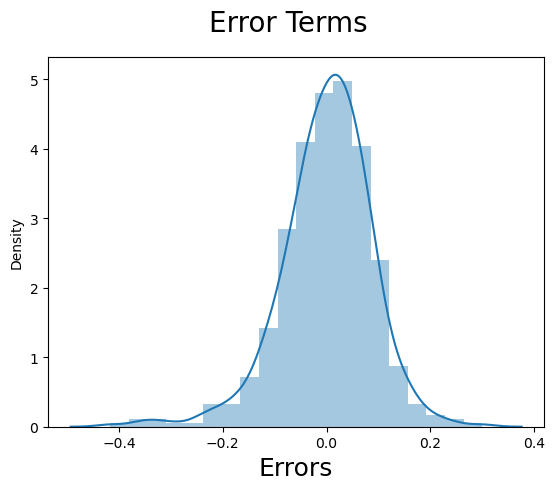

In [612]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_Pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
#Error term is normally destributed and cwentered around 0

#### Predict on test set and perform Inference

In [620]:
#### Applying the scaling on the test sets
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt"]
df_test[num_vars] = scaler.transform(df_test[num_vars])


#### Dividing into X_test and y_test

In [630]:
y_test = df_test.pop('cnt')
X_test = df_test

In [644]:
# Now let's use our model to make predictions.
# Adding a constant variable 
X_test = sm.add_constant(X_test)

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]



In [649]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

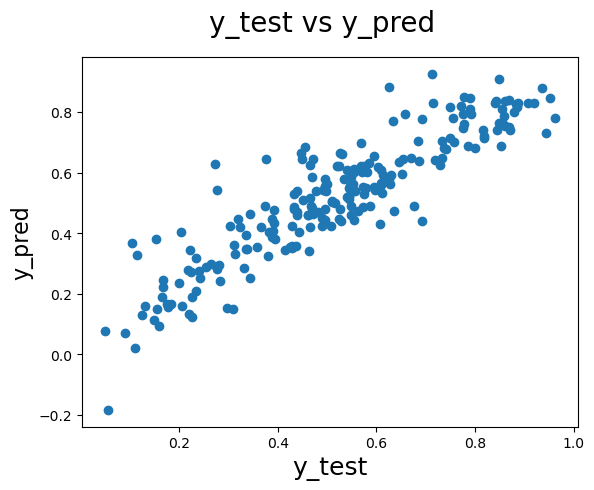

In [656]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### Calculating R-squared value for test set to verify if model's predictability and accuracy is in same range as in training set

In [664]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8104202435274624

## Conclusion:

1. R-squared value for training set is 84% while it's for test set is 81%. Differance 3% is well withing accepted limit, which verify that model is performing well for prediction.
2. Error term is also normally distributed and mean centered around 0.
3. y_test and Y_predicted are showing linear relation with constant variance within range.
4. Formula for cnt will be as given below (Values should be passed as scaled):
   > cnt_pred = 0.1469 + (0.1469 * const) + (0.2296 * yr) + (0.0530 * workingday) + (0.5483 * temp) + (-0.1581 * hum) + (-0.1967 * windspeed) + (0.0720 * season_summer) + (0.1412 * season_winter) + (0.0635 * weekday_Sun) + (0.0567 * weathersit_clear) + (-0.1937 * weathersit_snow) + (-0.0354 * mnth_Dec) + (-0.0508 * mnth_Jan) + (-0.0413 * mnth_July) + (-0.0364 * mnth_Nov) + (0.0859 * mnth_Sep) 